In [39]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# load all per-run CSVs
csv_paths = glob.glob("results/run_*/runs_quick.csv")

if not csv_paths:
    raise FileNotFoundError("No runs_quick.csv files found under results/run_*")

df = pd.concat(
    [pd.read_csv(p) for p in csv_paths],
    ignore_index=True
)

# keep only LoRA runs from this assignment
df = df[df["spec.run_kind"] == "lora"]

# convenience columns
df["rank"] = df["spec.lora_rank"]
df["alpha"] = df["spec.lora_alpha"]
df["lr"] = df["spec.learning_rate"]
df["bs"] = df["spec.batch_size"]
df["matrices"] = df["spec.lora_attn_matrices"]
df["merge"] = df["spec.merge_lora"]
df["acc"] = df["eval_accuracy"] * 100

print(f"Loaded {len(df)} LoRA runs from {len(csv_paths)} jobs")


Loaded 62 LoRA runs from 7 jobs


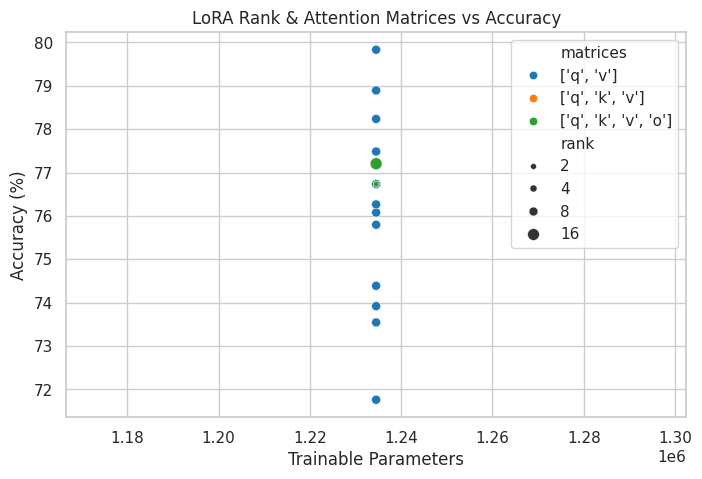

In [40]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x="trainable_params",
    y="acc",
    hue="matrices",
    size="rank",
    palette="tab10",
)
plt.title("LoRA Rank & Attention Matrices vs Accuracy")
plt.xlabel("Trainable Parameters")
plt.ylabel("Accuracy (%)")
plt.show()


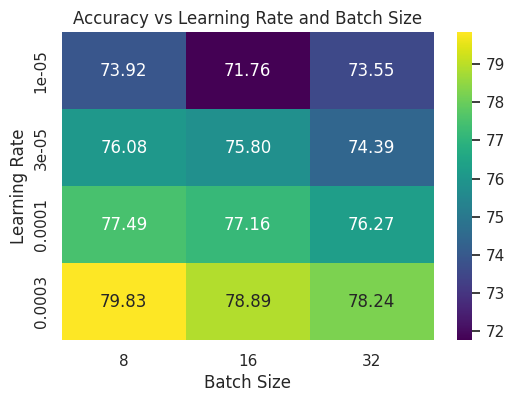

In [41]:
lr_bs_df = df[df["merge"] == "never"]

pivot = lr_bs_df.pivot_table(
    index="lr",
    columns="bs",
    values="acc",
    aggfunc="mean"
)

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="viridis")
plt.title("Accuracy vs Learning Rate and Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Learning Rate")
plt.show()


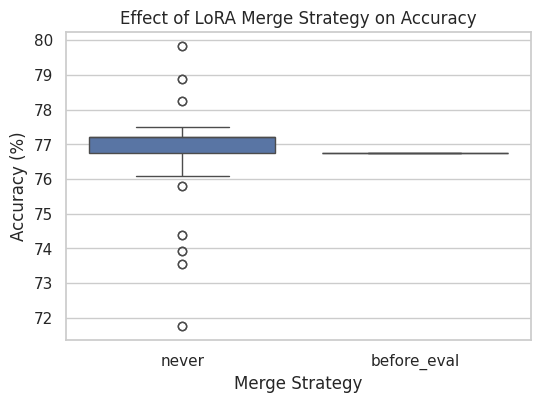

In [42]:
merge_df = df[df["merge"].isin(["before_eval", "never"])]

plt.figure(figsize=(6,4))
sns.boxplot(
    data=merge_df,
    x="merge",
    y="acc"
)
plt.title("Effect of LoRA Merge Strategy on Accuracy")
plt.xlabel("Merge Strategy")
plt.ylabel("Accuracy (%)")
plt.show()
